<h1><center>Alexnet Architecture (Tensorflow)</center></h1>

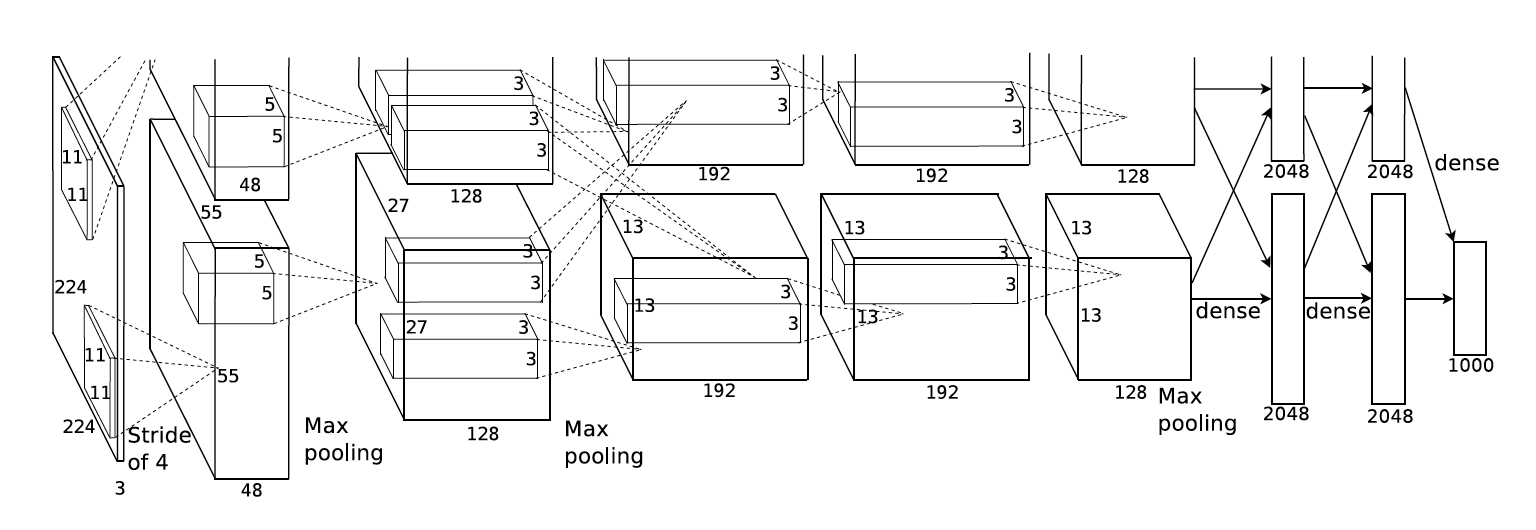

In [1]:
from IPython.display import Image
Image(filename='image/image.png') 

In [2]:
import tensorflow as tf

In [3]:
X = tf.placeholder(tf.float32, [None, 227, 227, 3])
Y = tf.placeholder(tf.float32, [None, 1000])
keep_prob = 0.5 # dropout rate

### Layer 1 (Convolutional)
* Input size : [227, 227, 3] → Output size : [55, 55, 96]
* \# of Weights : ( 11 X 11 X 3 + 1 ) X 96 = 34,944

In [4]:
# kernel size = [11, 11] / Dimension of X = 3 / # of filters = 96
W1 = tf.Variable(tf.random_normal([11, 11, 3, 96]))

L1 = tf.nn.conv2d(X, W1, strides = [1, 4, 4, 1], padding='VALID')

L1 = tf.nn.relu(L1)
print(L1)

Tensor("Relu:0", shape=(?, 55, 55, 96), dtype=float32)


### Layer 2 (Convolutional & Max Pooling)
* Input size : [55, 55, 96] → Output size : [27, 27, 256]
* \# of Weights : ( 5 X 5 X 96 + 1 ) X 256 = 614,656

In [5]:
# kernel size = [5, 5] / Dimension of L1 = 96 / # of filters = 256
W2 = tf.Variable(tf.random_normal([5, 5, 96, 256]))
L2 = tf.nn.conv2d(L1, W2, strides = [1, 1, 1, 1], padding='SAME')

L2 = tf.nn.relu(L2)
print(L2)
L2 = tf.nn.max_pool(L2, ksize=[1, 3, 3, 1], strides=[1, 2, 2, 1], padding='VALID')
print(L2)

Tensor("Relu_1:0", shape=(?, 55, 55, 256), dtype=float32)
Tensor("MaxPool:0", shape=(?, 27, 27, 256), dtype=float32)


### Layer 3 (Convolutional & Max Pooling)
* Input size : [27, 27, 256] → Output size : [13, 13, 384]
* \# of Weights : ( 3 X 3 X 256 + 1 ) X 384 = 8,851,120

In [6]:
# kernel size = [3, 3] / Dimension of L2 = 256 / # of filters = 384
W3 = tf.Variable(tf.random_normal([3, 3, 256, 384]))
L3 = tf.nn.conv2d(L2, W3, strides = [1, 1, 1, 1], padding='SAME')

L3 = tf.nn.relu(L3)
print(L3)
L3 = tf.nn.max_pool(L3, ksize=[1, 3, 3, 1], strides=[1, 2, 2, 1], padding='VALID')
print(L3)

Tensor("Relu_2:0", shape=(?, 27, 27, 384), dtype=float32)
Tensor("MaxPool_1:0", shape=(?, 13, 13, 384), dtype=float32)


### Layer 4 (Convolutional)
* Input size : [13, 13, 384] → Output size : [13, 13, 384]
* \# of Weights : ( 3 X 3 X 384 + 1 ) X 384 = 1,327,488 

In [7]:
# kernel size = [3, 3] / Dimension of L3 = 384 / # of filters = 384
W4 = tf.Variable(tf.random_normal([3, 3, 384, 384]))
L4 = tf.nn.conv2d(L3, W4, strides = [1, 1, 1, 1], padding='SAME')

L4 = tf.nn.relu(L4)
print(L4)

Tensor("Relu_3:0", shape=(?, 13, 13, 384), dtype=float32)


### Layer 5 (Convolutional)
* Input size : [13, 13, 384] → Output size : [13, 13, 256]
* \# of Weights : ( 3 X 3 X 384 ) X 256 = 884,736

In [8]:
# kernel size = [3, 3] / Dimension of L4 = 384 / # of filters = 384
W5 = tf.Variable(tf.random_normal([3, 3, 384, 256]))
L5 = tf.nn.conv2d(L4, W5, strides = [1, 1, 1, 1], padding='SAME')

L5 = tf.nn.relu(L5)
L5 = tf.nn.max_pool(L5, ksize=[1, 3, 3, 1], strides=[1, 2, 2, 1], padding='VALID')

print(L5)

Tensor("MaxPool_2:0", shape=(?, 6, 6, 256), dtype=float32)


### Layer 6 (FC)
* Input size : [13, 13, 256] → Output size : [4096]
* \# of Weights : ( 6 X 6 X 256 ) X 4,096 = 37,748,736

In [9]:
W6 = tf.Variable(tf.random_normal([6*6*256, 2048*2]))
L6 = tf.reshape(L5, [-1, 6*6*256])
L6 = tf.matmul(L6, W6)
L6 = tf.nn.relu(L6)
L6 = tf.nn.dropout(L6, keep_prob)
print(L6)

Tensor("dropout/mul:0", shape=(?, 4096), dtype=float32)


### Layer 7 (FC)
* Input size : [4096] → Output size : [4096]
* \# of Weights : 4,096 X 4,096 + 4,096 = 16,781,312

In [10]:
W7 = tf.Variable(tf.random_normal([2048*2, 2048*2]))
L7 = tf.matmul(L6, W7)
L7 = tf.nn.relu(L7)
L7 = tf.nn.dropout(L7, keep_prob)
print(L7)

Tensor("dropout_1/mul:0", shape=(?, 4096), dtype=float32)


### Layer 8 (FC)
* Input size : [4096] → Output size : [1000]
* \# of Weights : 4,096 X 1,000 + 4,096 = 4,100,096

In [11]:
W8 = tf.Variable(tf.random_normal([2048*2, 1000]))
model = tf.matmul(L7, W8)
print(model)

Tensor("MatMul_2:0", shape=(?, 1000), dtype=float32)
